In [ ]:
pip install pandas nltk matplotlib wordcloud

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
from collections import Counter

from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data = pd.read_csv('Tweets.csv')
data.head() # Display the first few rows of the dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

data['cleaned_text'] = data['text'].apply(clean_text)

In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

data['stemmed_text'] = data['cleaned_text'].apply(stem_tokens)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize_tokens)

In [ ]:
def join_tokens(tokens_list):
    return ' '.join(tokens_list)
data['original_text_joined'] = data['text']
data['cleaned_text_joined'] = data['cleaned_text'].apply(join_tokens)
data['stemmed_text_joined'] = data['stemmed_text'].apply(join_tokens)
data['lemmatized_text_joined'] = data['lemmatized_text'].apply(join_tokens)


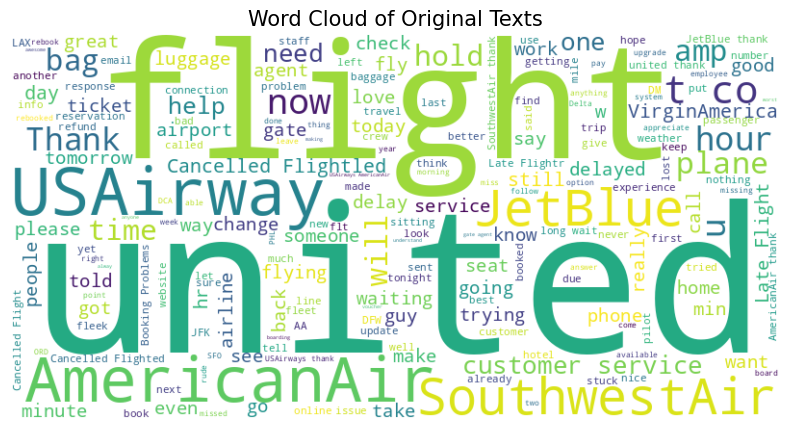

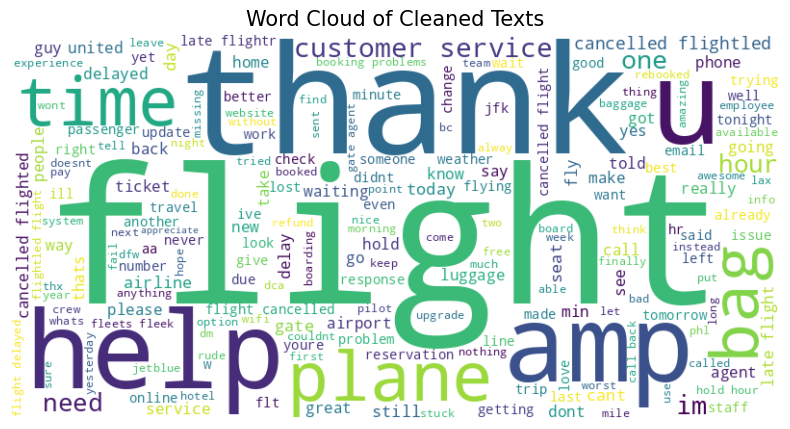

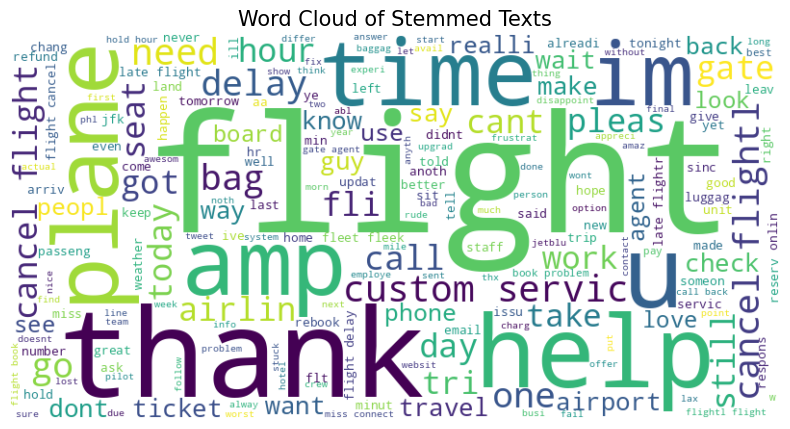

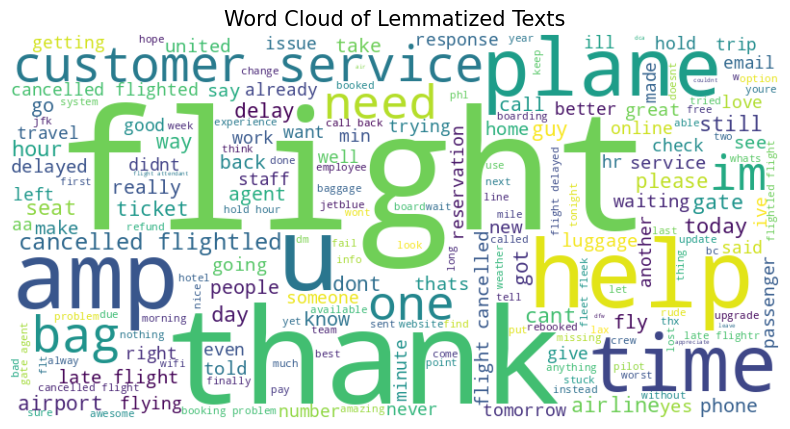

In [ ]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

generate_wordcloud(' '.join(data['original_text_joined']), 'Word Cloud of Original Texts')
generate_wordcloud(' '.join(data['cleaned_text_joined']), 'Word Cloud of Cleaned Texts')
generate_wordcloud(' '.join(data['stemmed_text_joined']), 'Word Cloud of Stemmed Texts')
generate_wordcloud(' '.join(data['lemmatized_text_joined']), 'Word Cloud of Lemmatized Texts')


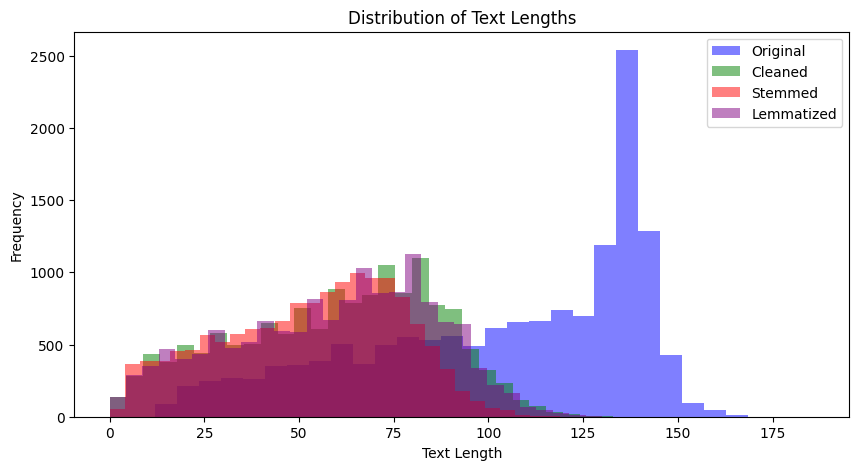

In [ ]:
plt.figure(figsize=(10, 5))

original_lengths = data['original_text_joined'].apply(len)
cleaned_lengths = data['cleaned_text_joined'].apply(len)
stemmed_lengths = data['stemmed_text_joined'].apply(len)
lemmatized_lengths = data['lemmatized_text_joined'].apply(len)

plt.hist(original_lengths, bins=30, alpha=0.5, label='Original', color='blue')
plt.hist(cleaned_lengths, bins=30, alpha=0.5, label='Cleaned', color='green')
plt.hist(stemmed_lengths, bins=30, alpha=0.5, label='Stemmed', color='red')
plt.hist(lemmatized_lengths, bins=30, alpha=0.5, label='Lemmatized', color='purple')

plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


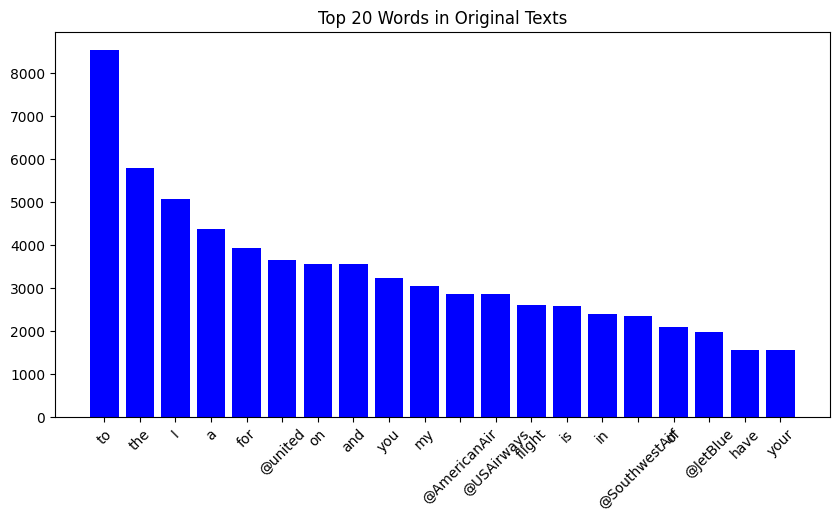

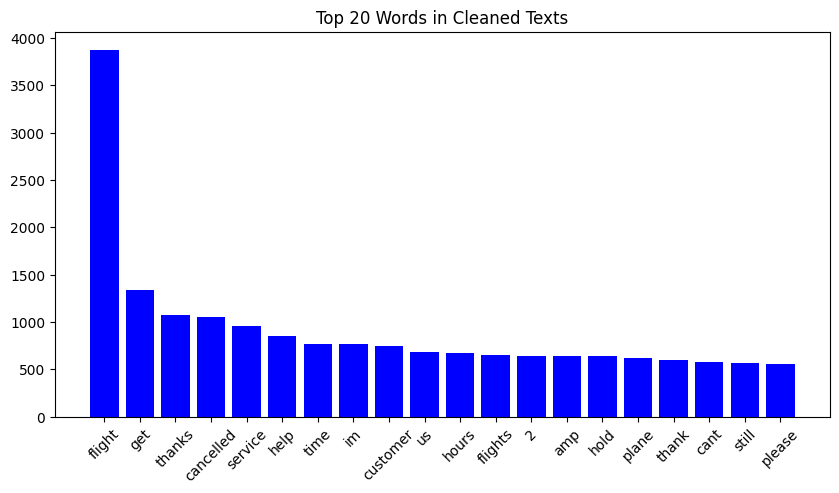

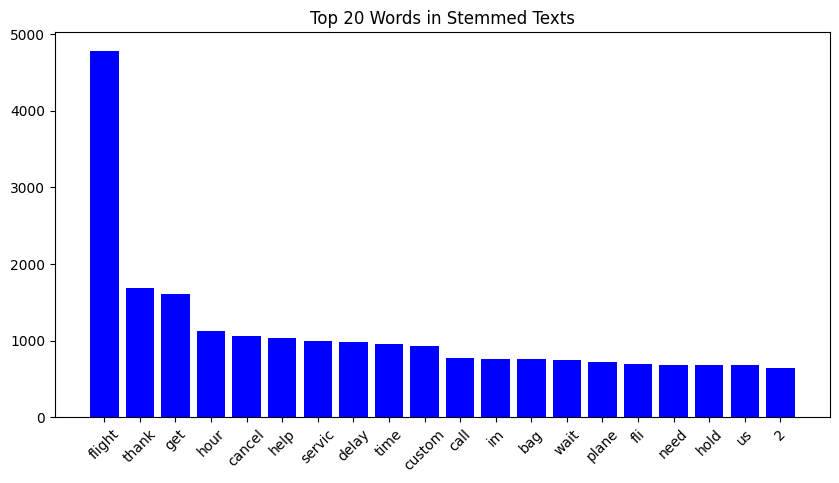

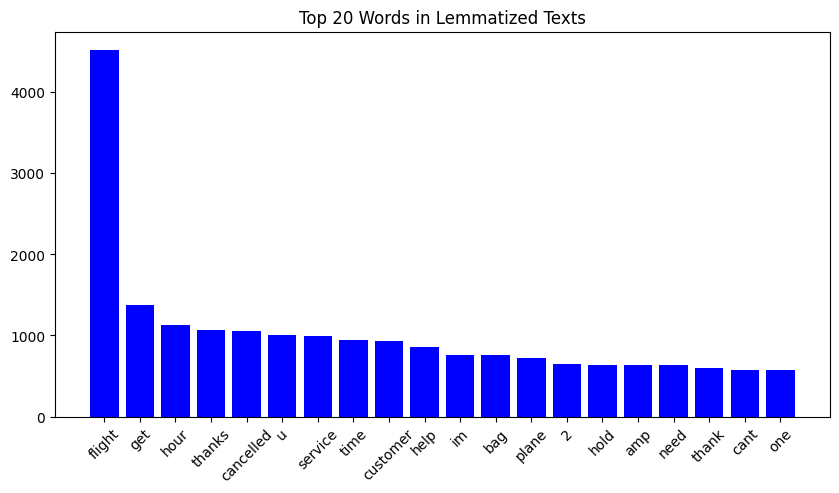

In [ ]:
def plot_word_frequencies(text, title):
    word_counts = Counter(text.split())
    common_words = word_counts.most_common(20)
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='blue')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
plot_word_frequencies(' '.join(data['original_text_joined']), 'Top 20 Words in Original Texts')
plot_word_frequencies(' '.join(data['cleaned_text_joined']), 'Top 20 Words in Cleaned Texts')
plot_word_frequencies(' '.join(data['stemmed_text_joined']), 'Top 20 Words in Stemmed Texts')
plot_word_frequencies(' '.join(data['lemmatized_text_joined']), 'Top 20 Words in Lemmatized Texts')